In [230]:
import numpy as np

a=np.load('./data/disease_nc/disease_nc.feats.npz')
print(a.files)
print(a['indptr'][1010])
print(a['indices'].shape)

l=np.load('./data/disease_nc/disease_nc.labels.npy')
l.shape
np.median(l)

#1044 subjects
#1000 features

#flatten 2 features (360,2) => (720,)


#TODO
#threshold edge connections! - 75%? basically binary classification 

##  FOR feats.npz: ##
#n=360? - number of features? 720 if we flatten
#indices (587*n,)  increases by 360 repeated until max value?
#indptr (361,)  [0, 360, 720, ... 360*n]
#format doesnt matter?
#shape (587, n)
#data flattened myelins tensor (587*n,) standard scaler normalization

## FOR labels.npy
#labels (587,) #MIN MAX NORMALIZE THIS, this is age for each subject

#add fc layer at the end to predict for age, change loss function / optimziation objective, etc

['indices', 'indptr', 'format', 'shape', 'data']
1010000
(1044000,)


np.float64(0.0)

In [ ]:
import networkx as nx

a=np.load('./data/camcan_nc/plv_tensor_592_sbj_filtered.npy')
print(a.shape)

b=np.load('./data/camcan_nc/cam_can_thicks_myelins_tensor_592_filtered.npy')
print(b.shape)
#print(b[0,0,:])
print(np.array(b[1,0,:]).shape)

G = nx.from_numpy_array(a[0,:,:])
print(np.array(G.edges).shape)
print(64980/360)

print(f'edges: {nx.number_of_edges(G)}')
print(f'nodes: {nx.number_of_nodes(G)}')
print(f'weighted?: {nx.is_weighted(G)}')

# w = nx.get_edge_attributes(G, "weight")
# np.savetxt('./data/camcan_nc/test.txt', w, delimiter=',')
# print(w)
# b=nx.generate_edgelist(G, delimiter=' ', data=True)
# print(b)

# print(np.array(G.edges).astype(int))
# print(np.zeros(360,))
# print(np.zeros(360*360,))
# print(np.arange(0,(360*360)+1,360))
# print(np.array(G.nodes).shape)
# print(np.repeat(np.arange(0,360,1),360).shape)
# print(np.zeros(360*360).shape)
#np.savetxt('./data/camcan_nc/camcan_nc.edges.csv', G.edges, delimiter=',', fmt='%i')

#np.savez('./data/camcan_nc/camcan_nc.feats.npz', indices=np.repeat(np.arange(0,360,1),360), indptr=np.arange(0,(360*360)+1,360), format=np.bytes_(b'csr'), shape=[360,360], data=np.zeros(360*360,))

# l=np.load('./data/camcan_nc/age_labels_592_sbj_filtered.npy')
# l.shape
l=np.zeros(360,)
#np.save('./data/camcan_nc/camcan_nc.labels.npy',l)

(587, 360, 360)
(2, 587, 360)
(360,)
(64980, 2)
180.5
edges: 64980
nodes: 360
weighted?: True


1.093167142990308
5.618846424290391
(587, 360)


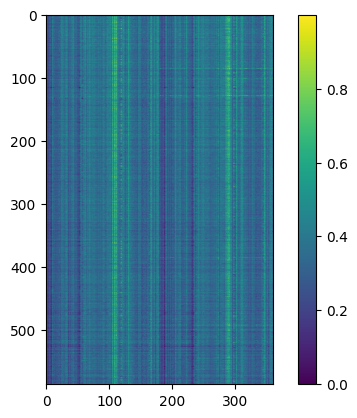

In [ ]:
import matplotlib.pyplot as plt

b=np.load('./data/camcan_nc/cam_can_thicks_myelins_tensor_592_filtered.npy')
# print(b.shape)
# #print(b[0,0,:])
# print(np.array(b[1,0,:]).shape)
tens=b[0,:,:] 
print(np.min(tens))
print(np.max(tens))
tens_norm = (tens-np.min(tens))/(np.max(tens) - np.min(tens) + 1e-8)

print(tens_norm.shape)

np.save('./data/camcan_nc/cam_can_thicks_myelin_tensor_592_norm.npy', tens_norm)

plt.imshow(tens_norm)
plt.colorbar()

In [219]:
#edgelist=np.read_csv('./data/disease_nc/disease_nc.edges.csv')
from numpy import genfromtxt
my_data = genfromtxt('./data/disease_nc/disease_nc.edges.csv', delimiter=',')
print(my_data)
my_data = np.array(my_data)
intarr = my_data.astype(int)
print(intarr.shape)
G = nx.from_edgelist(intarr)
print(G.edges)

[[0.000e+00 1.000e+00]
 [0.000e+00 2.000e+00]
 [0.000e+00 3.000e+00]
 ...
 [2.600e+02 1.041e+03]
 [2.600e+02 1.042e+03]
 [2.600e+02 1.043e+03]]
(1043, 2)
[(np.int64(0), np.int64(1)), (np.int64(0), np.int64(2)), (np.int64(0), np.int64(3)), (np.int64(1), np.int64(4)), (np.int64(1), np.int64(5)), (np.int64(1), np.int64(6)), (np.int64(1), np.int64(7)), (np.int64(1), np.int64(8)), (np.int64(1), np.int64(9)), (np.int64(2), np.int64(10)), (np.int64(2), np.int64(11)), (np.int64(3), np.int64(12)), (np.int64(3), np.int64(13)), (np.int64(3), np.int64(14)), (np.int64(3), np.int64(15)), (np.int64(3), np.int64(16)), (np.int64(4), np.int64(17)), (np.int64(4), np.int64(18)), (np.int64(4), np.int64(19)), (np.int64(4), np.int64(20)), (np.int64(4), np.int64(21)), (np.int64(5), np.int64(22)), (np.int64(5), np.int64(23)), (np.int64(5), np.int64(24)), (np.int64(5), np.int64(25)), (np.int64(6), np.int64(26)), (np.int64(6), np.int64(27)), (np.int64(7), np.int64(28)), (np.int64(7), np.int64(29)), (np.int64(8),

## Data Preprocessing

In [197]:
subj_id=0

In [ ]:
# OLD Edge Binarization using a threshold
# def create_edgelist(data_path, threshold):
#     data = np.load(data_path)
#     edges=[]

#     for gid in range(0,data.shape[0]):
#         data = np.load(data_path)
#         G = nx.from_numpy_array(data[gid,:,:])
#         n_feats=360
#         for u, v, data in G.edges(data=True):
#             scale=gid*n_feats
#             if(data['weight'] != 1 and data['weight'] > threshold):
#                 #print(f"Edge ({u+scale}, {v+scale}): Weight = {data['weight']}")
#                 edges.append([u+scale,v+scale])

#         bG = nx.from_edgelist(np.array(edges))

#     #print(np.array(edges).shape)
#     np.savetxt('./data/camcan_nc/camcan_nc.edges.csv', edges, delimiter=',', fmt='%i')

# create_edgelist('./data/camcan_nc/plv_tensor_592_sbj_filtered.npy', 0.75)

#change this to use numpy instead of networkx please!

In [218]:
# Edge Binarization using a threshold
def create_edgelist(data_path, threshold):
    data = np.load(data_path)
    edges=[]

    gid=subj_id
    data = np.load(data_path)
    G = nx.from_numpy_array(data[gid,:,:])
    n_feats=360
    for u, v, data in G.edges(data=True):
        scale=gid*n_feats
        if(data['weight'] != 1 and data['weight'] > threshold):
            #print(f"Edge ({u+scale}, {v+scale}): Weight = {data['weight']}")
            edges.append([u+scale,v+scale])

    bG = nx.from_edgelist(np.array(edges))

    print(np.array(edges).shape)
    np.savetxt('./data/camcan_nc/camcan_nc.edges.csv', edges, delimiter=',', fmt='%i')

create_edgelist('./data/camcan_nc/plv_tensor_592_sbj_filtered.npy', 0.75)

#change this to use numpy instead of networkx please!

(142, 2)


In [ ]:
# Edge Binarization using a threshold
def create_adjmat(data_path, threshold):
    data = np.load(data_path)
    data=data[subj_id,:,:]

    #adj=np.zeros([360,360])
    data [data == 1] = 0
    data [data >= threshold] = 1
    data [data <= threshold] = 0

#create_edgelist('./data/camcan_nc/plv_tensor_592_sbj_filtered.npy', 0.75)

#change this to use numpy instead of networkx please!
create_adjmat('./data/camcan_nc/plv_tensor_592_sbj_filtered.npy', .360)

(360, 360)
(360, 360)


In [168]:
def norm_mm(tensor):
    return ((tensor-np.min(tensor))/(np.max(tensor)-np.min(tensor)+1e-8))

In [169]:
from sklearn.preprocessing import StandardScaler
def norm_ss(tensor):
    scaler = StandardScaler()
    return scaler.fit_transform(tensor)

In [208]:
# Import cam_can myelins data (flatten thickness as well? doesn't that change things tho?)
data = np.load('./data/camcan_nc/cam_can_thicks_myelins_tensor_592_filtered.npy')
#data = norm_ss(data[:,:,:]) #standard scaler norm
print(data[:,subj_id,:].shape)
data = data[:,subj_id,:].T
data = norm_ss(data)
data = data.flatten()
print(data.shape)
# print(data[0,:].shape)
# print(data[1,1])
# print(data.shape)
# data = data.flatten() #flatten from (587,360) to (587*n,)
# print(data.shape)
# print(data[361])

(2, 360)
(720,)


In [211]:
indices = np.repeat(np.arange(0,2,1),360)
indices.shape

(720,)

In [212]:
indptr = np.arange(0,(360*2)+1,2)
indptr.shape

(361,)

In [213]:
format=np.bytes_(b'csr')

In [214]:
shape=np.array([360,2]) #(587,n)

In [215]:
#save to feature list .npz
np.savez('./data/camcan_nc/camcan_nc.feats.npz', indices=indices, indptr=indptr, format=format, shape=shape, data=data)

In [225]:
#preprocess labels
labels = np.load('./data/camcan_nc/age_labels_592_sbj_filtered.npy')
labels = norm_mm(labels)
labels = np.repeat(labels[subj_id],360)
labels

array([0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169, 0.0805169,
       0.0805169, 0.0805169, 0.0805169, 0.0805169, 

In [226]:
#save labels to labels list .npy
np.save('./data/camcan_nc/camcan_nc.labels.npy',labels)